In [3]:
import pandas as pd
import numpy as np
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /home/rashmi-
[nltk_data]     meshram/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
df=pd.read_csv('datasets/flipkart_laptop_review_data.csv')
df

,Product Review ID,Title,rating,detail_review,upvote,downvote
0,1,Really Nice,4.0,The base is becoming a bit Heat within 30 minu...,289,60
1,1,Terrific purchase,5.0,Hey everyone After reading all reviews I have ...,303,71
2,1,Decent product,3.0,Good for Normal useBattery 7/10Display 6/10Mul...,19,1
3,1,Nice product,4.0,In this price range its best laptop.,109,22
4,1,Excellent,5.0,Very fast laptop go for it little bit heating ...,136,30
...,...,...,...,...,...,...
4890,743,Highly recommended,5.0,This laptop is awesome everything is good the ...,6,1
4891,743,Does the job,3.0,got it for 61k during bbd. performance is quit...,3,0
4892,743,Great product,5.0,Awesome 😎🙌,3,0
4893,743,Best in the market!,5.0,Don't expect to much from the gaming laptop ba...,12,7


In [5]:
review_title = pd.DataFrame(data=df['Title'])
review_data = pd.DataFrame(data=df['detail_review'])

In [6]:
review_data.head(10)

,detail_review
0,The base is becoming a bit Heat within 30 minu...
1,Hey everyone After reading all reviews I have ...
2,Good for Normal useBattery 7/10Display 6/10Mul...
3,In this price range its best laptop.
4,Very fast laptop go for it little bit heating ...
5,Nice product suitable for any type of working ...
6,Nice laptop
7,This Is one of the best laptop..good battery b...
8,Received today don't know about performance bu...
9,Value For Money


In [7]:
review_title.head(10)

,Title
0,Really Nice
1,Terrific purchase
2,Decent product
3,Nice product
4,Excellent
5,Excellent
6,Mind-blowing purchase
7,Great product
8,Nice product
9,Nice product


In [8]:
blanks = []
# .itertuples() generates an iterator object of the DataFrame, 
#  returning each row as a Python Tuple object.
# The isspace() method returns True if all the characters in a string are 
# whitespaces, otherwise False.
for i, rv in review_data.itertuples():
    if type(rv)==str:
        if rv.isspace():
            blanks.append(i)
t_blanks = []
        
for j, rt in review_title.itertuples():
    if type(rt)==str:
        if rt.isspace():
            t_blanks.append(j)

In [9]:
blanks

[]

In [10]:
t_blanks

[]

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [12]:
sid = SentimentIntensityAnalyzer()

In [13]:
review_data['detail_review'] = review_data['detail_review'].apply(lambda review: str(review))


review_title['Title'] = review_title['Title'].apply(lambda review_t: str(review_t))


In [14]:
review_data['score'] = review_data['detail_review'].apply(lambda review: sid.polarity_scores(review))


review_title['t_score'] = review_title['Title'].apply(lambda t_review: sid.polarity_scores(t_review))

In [15]:
review_data.head(10)

,detail_review,score
0,The base is becoming a bit Heat within 30 minu...,"{'neg': 0.244, 'neu': 0.614, 'pos': 0.142, 'co..."
1,Hey everyone After reading all reviews I have ...,"{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'comp..."
2,Good for Normal useBattery 7/10Display 6/10Mul...,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp..."
3,In this price range its best laptop.,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp..."
4,Very fast laptop go for it little bit heating ...,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp..."
5,Nice product suitable for any type of working ...,"{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'comp..."
6,Nice laptop,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp..."
7,This Is one of the best laptop..good battery b...,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp..."
8,Received today don't know about performance bu...,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp..."
9,Value For Money,"{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'comp..."


In [16]:
review_title.head(10)

,Title,t_score
0,Really Nice,"{'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'comp..."
1,Terrific purchase,"{'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'comp..."
2,Decent product,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Nice product,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp..."
4,Excellent,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
5,Excellent,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
6,Mind-blowing purchase,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7,Great product,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
8,Nice product,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp..."
9,Nice product,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp..."


In [17]:
review_data['compound'] = review_data['score'].apply(lambda dic: dic['compound'])

review_title['t_compound'] = review_title['t_score'].apply(lambda dic: dic['compound'])


In [18]:
review_data.head()

,detail_review,score,compound
0,The base is becoming a bit Heat within 30 minu...,"{'neg': 0.244, 'neu': 0.614, 'pos': 0.142, 'co...",-0.3919
1,Hey everyone After reading all reviews I have ...,"{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'comp...",0.8777
2,Good for Normal useBattery 7/10Display 6/10Mul...,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...",0.6757
3,In this price range its best laptop.,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6369
4,Very fast laptop go for it little bit heating ...,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.4782


In [19]:
review_title.head()

,Title,t_score,t_compound
0,Really Nice,"{'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'comp...",0.4754
1,Terrific purchase,"{'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'comp...",0.4767
2,Decent product,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,Nice product,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215
4,Excellent,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5719


In [20]:
review_data['sentiment'] = review_data['compound'].apply(lambda com: 'Positive' if com>0  else 'Negative' if com<0  else 'Neutral' )

In [21]:
review_data.head(10)

,detail_review,score,compound,sentiment
0,The base is becoming a bit Heat within 30 minu...,"{'neg': 0.244, 'neu': 0.614, 'pos': 0.142, 'co...",-0.3919,Negative
1,Hey everyone After reading all reviews I have ...,"{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'comp...",0.8777,Positive
2,Good for Normal useBattery 7/10Display 6/10Mul...,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...",0.6757,Positive
3,In this price range its best laptop.,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6369,Positive
4,Very fast laptop go for it little bit heating ...,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.4782,Positive
5,Nice product suitable for any type of working ...,"{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'comp...",0.4215,Positive
6,Nice laptop,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,Positive
7,This Is one of the best laptop..good battery b...,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.8625,Positive
8,Received today don't know about performance bu...,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp...",0.5719,Positive
9,Value For Money,"{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'comp...",0.3400,Positive


In [22]:
review_title['t_sentiment'] = review_title['t_compound'].apply(lambda com: 'Positive' if com>0  else 'Negative' if com<0  else 'Neutral' )

In [23]:
review_title.head(10)

,Title,t_score,t_compound,t_sentiment
0,Really Nice,"{'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'comp...",0.4754,Positive
1,Terrific purchase,"{'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'comp...",0.4767,Positive
2,Decent product,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,Nice product,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,Positive
4,Excellent,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5719,Positive
5,Excellent,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5719,Positive
6,Mind-blowing purchase,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
7,Great product,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,Positive
8,Nice product,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,Positive
9,Nice product,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,Positive


In [24]:
import random


In [25]:
review_data.sample(5)

,detail_review,score,compound,sentiment
2341,"very nice product, good for gaming also........","{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp...",0.7397,Positive
1474,Good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive
967,Nice product,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,Positive
2040,Product Is Good Display Also Good,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.7003,Positive
3796,Absolute amazing laptop with top level specifi...,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...",0.8971,Positive


In [26]:
review_title.sample(10)

,Title,t_score,t_compound,t_sentiment
2659,Awesome,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6249,Positive
4482,Worth every penny,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.2263,Positive
4184,Decent product,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4460,Useless product,"{'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'comp...",-0.4215,Negative
2941,Nice product,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,Positive
1855,Super!,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6360,Positive
1197,Mind-blowing purchase,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2471,Pretty good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.7269,Positive
4782,Nice product,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,Positive
217,Terrible product,"{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'comp...",-0.4767,Negative


In [27]:
df['combinedSentiment'] = (review_title['t_compound'] + review_data['compound'])/2

In [28]:
df.head(10)

,Product Review ID,Title,rating,detail_review,upvote,downvote,combinedSentiment
0,1,Really Nice,4.0,The base is becoming a bit Heat within 30 minu...,289,60,0.04175
1,1,Terrific purchase,5.0,Hey everyone After reading all reviews I have ...,303,71,0.67720
2,1,Decent product,3.0,Good for Normal useBattery 7/10Display 6/10Mul...,19,1,0.33785
3,1,Nice product,4.0,In this price range its best laptop.,109,22,0.52920
4,1,Excellent,5.0,Very fast laptop go for it little bit heating ...,136,30,0.52505
5,1,Excellent,5.0,Nice product suitable for any type of working ...,134,30,0.49670
6,1,Mind-blowing purchase,5.0,Nice laptop,121,28,0.21075
7,1,Great product,5.0,This Is one of the best laptop..good battery b...,25,3,0.74370
8,1,Nice product,4.0,Received today don't know about performance bu...,96,24,0.49670
9,1,Nice product,4.0,Value For Money,15,1,0.38075


In [29]:
df['sentiment'] = df['combinedSentiment'].apply(lambda com: 'Positive' if com>0  else 'Negative' if com<0  else 'Neutral' )

In [30]:
df

,Product Review ID,Title,rating,detail_review,upvote,downvote,combinedSentiment,sentiment
0,1,Really Nice,4.0,The base is becoming a bit Heat within 30 minu...,289,60,0.04175,Positive
1,1,Terrific purchase,5.0,Hey everyone After reading all reviews I have ...,303,71,0.67720,Positive
2,1,Decent product,3.0,Good for Normal useBattery 7/10Display 6/10Mul...,19,1,0.33785,Positive
3,1,Nice product,4.0,In this price range its best laptop.,109,22,0.52920,Positive
4,1,Excellent,5.0,Very fast laptop go for it little bit heating ...,136,30,0.52505,Positive
...,...,...,...,...,...,...,...,...
4890,743,Highly recommended,5.0,This laptop is awesome everything is good the ...,6,1,0.60740,Positive
4891,743,Does the job,3.0,got it for 61k during bbd. performance is quit...,3,0,0.35890,Positive
4892,743,Great product,5.0,Awesome 😎🙌,3,0,0.62490,Positive
4893,743,Best in the market!,5.0,Don't expect to much from the gaming laptop ba...,12,7,0.65325,Positive


In [31]:
df.sample(10)

,Product Review ID,Title,rating,detail_review,upvote,downvote,combinedSentiment,sentiment
2563,359,Wonderful,4.0,Awesome,1,0,0.59840,Positive
1398,206,Classy product,5.0,"True premium laptop, speed, performance,looks ...",5,0,0.68970,Positive
2471,343,Pretty good,4.0,Good product value for money very fast delivery,12,2,0.68775,Positive
3049,426,Worst experience ever!,NaN,Heating prolemREAD MORE,0,0,-0.32940,Negative
2854,398,Awesome,5.0,Nice product with good display.,0,0,0.65785,Positive
36,6,Just wow!,5.0,Its really very good and compact device.,179,38,0.58090,Positive
2557,358,Awesome,5.0,Nice product,1,2,0.52320,Positive
2249,316,Terrific,5.0,Very good laptop for general purpose and lite ...,3,2,0.48470,Positive
1870,265,Best in the market!,5.0,No compromise in performance and the thermals ...,342,76,0.79225,Positive
2765,384,Super!,5.0,Nice proformance Good bild Quality,43,5,0.66340,Positive


sentiment
Positive    4217
Negative     608
Neutral       70
Name: count, dtype: int64


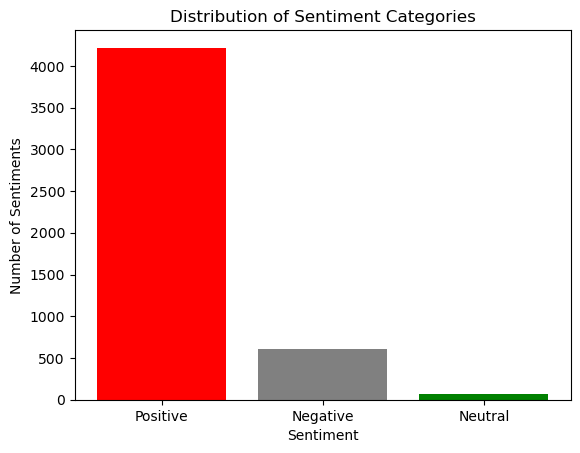

In [32]:
import matplotlib.pyplot as plt

# Assuming 'SentimentCategory' is a categorical column in your DataFrame
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)
# Plotting the bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'grey', 'green'])
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Number of Sentiments')
plt.show()

In [33]:
num_rows, num_columns = df.shape
print(f'Total number of rows: {num_rows}')
print(f'Total number of columns: {num_columns}')


Total number of rows: 4895
Total number of columns: 8


In [34]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

#catagorize the values based on their rating
def categorize_rating(rate):
    if rate == 5:
        return 'Excellent'
    elif rate == 4:
        return 'Good'
    elif rate == 3:
        return 'Average'
    elif rate == 2:
        return 'Poor'
    elif rate == 1:
        return 'Very Poor'
    else:
        return 'Invalid Rating'

df['RatingCategory'] = df['rating'].apply(categorize_rating)


In [35]:
df.sample(10)

,Product Review ID,Title,rating,detail_review,upvote,downvote,combinedSentiment,sentiment,RatingCategory
4719,712,Wonderful,4.0,Sound quality:-4/5Video quality:-3.5/5Performa...,3,0,0.59170,Positive,Good
809,136,Nice product,4.0,Superb product for studentsValue of money prod...,6,0,0.67980,Positive,Good
966,154,Worthless,NaN,Very badOverheatingWaste of moneyDell service ...,12,1,-0.49135,Negative,Invalid Rating
4664,701,Brilliant,5.0,"good finish, good product, definitely worth pu...",1,0,0.72070,Positive,Excellent
1940,274,Very Good,4.0,Display can be better.Camera is very bad.Perfo...,4,0,0.53230,Positive,Good
2517,351,Awesome,5.0,Best Product And Prompt Delivery,1,0,0.63090,Positive,Excellent
3028,424,Horrible,NaN,Not good... Battery backup is just 1 hour on f...,3,1,-0.06040,Negative,Invalid Rating
4873,741,Worth every penny,5.0,Product is good at this price range got at 380...,8,2,0.49565,Positive,Excellent
3162,446,Just okay,3.0,Writing this review after using it for 7 days....,112,37,-0.30295,Negative,Average
2424,338,Best in the market!,5.0,Go for it best in budget,11,3,0.65325,Positive,Excellent


RatingCategory
Excellent         2954
Good              1038
Invalid Rating     608
Average            295
Name: count, dtype: int64


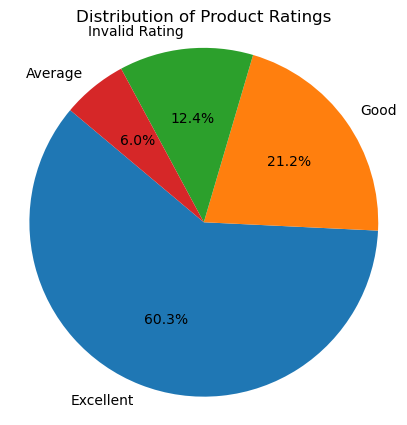

In [36]:
rating_counts = df['RatingCategory'].value_counts()
print(rating_counts)
# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Product Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [37]:
# review_data = review_data.drop('detail_review', axis=1, inplace = True)

In [38]:
# result = pd.concat(frames,axis=1)
# displa/y(result)



In [39]:
# result = df.append(review_data)
# display(result)

In [40]:
df['review_trueness'] =  (df['upvote'])/(df['upvote']+df['downvote'])

In [41]:
df['review_trueness']

0       0.828080
1       0.810160
2       0.950000
3       0.832061
4       0.819277
          ...   
4890    0.857143
4891    1.000000
4892    1.000000
4893    0.631579
4894    0.800000
Name: review_trueness, Length: 4895, dtype: float64

In [42]:
df

,Product Review ID,Title,rating,detail_review,upvote,downvote,combinedSentiment,sentiment,RatingCategory,review_trueness
0,1,Really Nice,4.0,The base is becoming a bit Heat within 30 minu...,289,60,0.04175,Positive,Good,0.828080
1,1,Terrific purchase,5.0,Hey everyone After reading all reviews I have ...,303,71,0.67720,Positive,Excellent,0.810160
2,1,Decent product,3.0,Good for Normal useBattery 7/10Display 6/10Mul...,19,1,0.33785,Positive,Average,0.950000
3,1,Nice product,4.0,In this price range its best laptop.,109,22,0.52920,Positive,Good,0.832061
4,1,Excellent,5.0,Very fast laptop go for it little bit heating ...,136,30,0.52505,Positive,Excellent,0.819277
...,...,...,...,...,...,...,...,...,...,...
4890,743,Highly recommended,5.0,This laptop is awesome everything is good the ...,6,1,0.60740,Positive,Excellent,0.857143
4891,743,Does the job,3.0,got it for 61k during bbd. performance is quit...,3,0,0.35890,Positive,Average,1.000000
4892,743,Great product,5.0,Awesome 😎🙌,3,0,0.62490,Positive,Excellent,1.000000
4893,743,Best in the market!,5.0,Don't expect to much from the gaming laptop ba...,12,7,0.65325,Positive,Excellent,0.631579


In [43]:
# PRS = product recommendation score
def prs_calculation(df):
    if (df['review_trueness'] >= 0.75):
        df['prs'] = df['combinedSentiment']*1
    elif (df['review_trueness'] < 0.75):
        df['prs'] = df['review_trueness']*(df['combinedSentiment'])
    else:
        df['prs'] = 0
    return df

df = df.apply(prs_calculation, axis = 1)

In [44]:
df

,Product Review ID,Title,rating,detail_review,upvote,downvote,combinedSentiment,sentiment,RatingCategory,review_trueness,prs
0,1,Really Nice,4.0,The base is becoming a bit Heat within 30 minu...,289,60,0.04175,Positive,Good,0.828080,0.828080
1,1,Terrific purchase,5.0,Hey everyone After reading all reviews I have ...,303,71,0.67720,Positive,Excellent,0.810160,0.810160
2,1,Decent product,3.0,Good for Normal useBattery 7/10Display 6/10Mul...,19,1,0.33785,Positive,Average,0.950000,0.950000
3,1,Nice product,4.0,In this price range its best laptop.,109,22,0.52920,Positive,Good,0.832061,0.832061
4,1,Excellent,5.0,Very fast laptop go for it little bit heating ...,136,30,0.52505,Positive,Excellent,0.819277,0.819277
...,...,...,...,...,...,...,...,...,...,...,...
4890,743,Highly recommended,5.0,This laptop is awesome everything is good the ...,6,1,0.60740,Positive,Excellent,0.857143,0.857143
4891,743,Does the job,3.0,got it for 61k during bbd. performance is quit...,3,0,0.35890,Positive,Average,1.000000,1.000000
4892,743,Great product,5.0,Awesome 😎🙌,3,0,0.62490,Positive,Excellent,1.000000,1.000000
4893,743,Best in the market!,5.0,Don't expect to much from the gaming laptop ba...,12,7,0.65325,Positive,Excellent,0.631579,0.412579


In [45]:
# result.to_csv('(NLTK)review_sentimental_analysis.csv',index=False)

In [46]:
df['prs'].sample(10)

3230    1.000000
4601    1.000000
4500    0.047440
3383    0.913043
4720    1.000000
3845    0.358523
3241    0.840909
2661    0.870968
1857    0.000000
1903    0.915663
Name: prs, dtype: float64

In [47]:
df

,Product Review ID,Title,rating,detail_review,upvote,downvote,combinedSentiment,sentiment,RatingCategory,review_trueness,prs
0,1,Really Nice,4.0,The base is becoming a bit Heat within 30 minu...,289,60,0.04175,Positive,Good,0.828080,0.828080
1,1,Terrific purchase,5.0,Hey everyone After reading all reviews I have ...,303,71,0.67720,Positive,Excellent,0.810160,0.810160
2,1,Decent product,3.0,Good for Normal useBattery 7/10Display 6/10Mul...,19,1,0.33785,Positive,Average,0.950000,0.950000
3,1,Nice product,4.0,In this price range its best laptop.,109,22,0.52920,Positive,Good,0.832061,0.832061
4,1,Excellent,5.0,Very fast laptop go for it little bit heating ...,136,30,0.52505,Positive,Excellent,0.819277,0.819277
...,...,...,...,...,...,...,...,...,...,...,...
4890,743,Highly recommended,5.0,This laptop is awesome everything is good the ...,6,1,0.60740,Positive,Excellent,0.857143,0.857143
4891,743,Does the job,3.0,got it for 61k during bbd. performance is quit...,3,0,0.35890,Positive,Average,1.000000,1.000000
4892,743,Great product,5.0,Awesome 😎🙌,3,0,0.62490,Positive,Excellent,1.000000,1.000000
4893,743,Best in the market!,5.0,Don't expect to much from the gaming laptop ba...,12,7,0.65325,Positive,Excellent,0.631579,0.412579


In [93]:
df_1 = df[["Product Review ID", "prs"]]
df_1

,Product Review ID,prs
0,1,0.828080
1,1,0.810160
2,1,0.950000
3,1,0.832061
4,1,0.819277
...,...,...
4890,743,0.857143
4891,743,1.000000
4892,743,1.000000
4893,743,0.412579


In [94]:
avg_scores = df_1.groupby('Product Review ID')['prs'].mean().reset_index()
avg_scores

,Product Review ID,prs
0,1,0.849909
1,2,0.890355
2,3,0.723684
3,4,0.411364
4,6,0.854367
...,...,...
630,738,0.917770
631,739,0.954095
632,741,0.909165
633,742,0.861621


In [95]:
# df.to_csv('(NLTK)review_sentimental_analysis.csv',index=False)

In [96]:
specs_df = pd.read_csv('datasets/flipkart_laptop_specs_data.csv')
specs_df

,Product,Price,Rating,Description,Url,Review Url,Sales Package,Model Number,Part Number,Model Name,...,Other Accessories,HDD Capacity,International Warranty,Firewire Port,Read/Write Speed,S-video,Color Gamut,Cloud Storage,Certification,Optane Memory
0,HP Intel Celeron Dual Core N4500 - (4 GB/128 G...,21990.0,3.9,Intel Celeron Dual Core Processor4 GB LPDDR4X ...,https://www.flipkart.com/hp-intel-celeron-dual...,https://www.flipkart.com/hp-intel-celeron-dual...,"Laptop, battery, power adapter, user guide",15a- na0012TU,743A1PA#ACJ,15a- na0012TU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CHUWI Intel Core i3 10th Gen 1005G1 - (8 GB/51...,23990.0,4.1,"Stylish, Thin and Portable Light Weight Laptop...",https://www.flipkart.com/chuwi-intel-core-i3-1...,https://www.flipkart.com/chuwi-intel-core-i3-1...,"Laptop, Charger, User Guide Manual",CoreBook X Grey,CWI575,CoreBook X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,APPLE 2022 MacBook Pro Apple M2 - (8 GB/256 GB...,102990.0,4.6,Apple M2 Processor8 GB Unified Memory RAMMac O...,https://www.flipkart.com/apple-2022-macbook-pr...,https://www.flipkart.com/apple-2022-macbook-pr...,"MacBook Pro, 67W USB-C Power Adapter, USB-C Ch...",MNEP3HN/A,MNEP3HN/A,MacBook Pro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,APPLE 2022 MacBook AIR Apple M2 - (8 GB/512 GB...,119990.0,4.6,Apple M2 Processor8 GB Unified Memory RAMMac O...,https://www.flipkart.com/apple-2022-macbook-ai...,https://www.flipkart.com/apple-2022-macbook-ai...,"MacBook Air, 35W Dual USB-C Port Power Adapter...",MLY23HN/A,MLY23HN/A,MacBook Air,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MSI Pulse 17 Intel Core i7 13th Gen 13700H - (...,128990.0,4.9,Intel Core i7 Processor (13th Gen)16 GB DDR5 R...,https://www.flipkart.com/msi-pulse-17-intel-co...,https://www.flipkart.com/msi-pulse-17-intel-co...,"Laptop, battery, power adapter, user guide, La...",Pulse 17 B13VFK-667IN,9S7-17L531-667,Pulse 17 B13VFK-667IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,DELL AMD Ryzen 3 Quad Core 5425U - (8 GB/256 G...,38200.0,4.3,Processor: R3-5425U (2.70 GHz up to 4.1 GHz)RA...,https://www.flipkart.com/dell-amd-ryzen-3-quad...,https://www.flipkart.com/dell-amd-ryzen-3-quad...,"Laptop, Battery, Adapter, Cables and User Manuals",Vostro 3425,D552305WIN9BE,Vostro 3425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
739,HP Victus AMD Ryzen 5 Hexa Core 5600H - (8 GB/...,54558.0,4.4,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,https://www.flipkart.com/hp-victus-amd-ryzen-5...,https://www.flipkart.com/hp-victus-amd-ryzen-5...,"Laptop, Power Adapter, User Guide, Warranty Do...",15-fb0040AX,6F9T7PA#ACJ,15-fb0040AX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,Acer Aspire AMD Ryzen 5 Quad Core 3500U - (8 G...,36999.0,4.3,AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,https://www.flipkart.com/acer-aspire-amd-ryzen...,https://www.flipkart.com/acer-aspire-amd-ryzen...,"Laptop, Power Adaptor, User Guide, Warranty Do...",A315-23,NX.HVTSI.008,Aspire 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,HP Omen AMD Ryzen 5 Hexa Core 4600H - (8 GB/51...,59000.0,4.7,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,https://www.flipkart.com/hp-omen-amd-ryzen-5-h...,https://www.flipkart.com/hp-omen-amd-ryzen-5-h...,"Laptop, Power Adaptor, User Guide, Warranty Do...",15-en0002AX,193D3PA#ACJ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# specs_df['Product ID'] = range(1, len(specs_df) + 1)


In [98]:
# specs_df

In [99]:
specs_df.insert(loc=0, column='Product ID', value=range(1, len(specs_df) + 1))

In [100]:
specs_df

,Product ID,Product,Price,Rating,Description,Url,Review Url,Sales Package,Model Number,Part Number,...,Other Accessories,HDD Capacity,International Warranty,Firewire Port,Read/Write Speed,S-video,Color Gamut,Cloud Storage,Certification,Optane Memory
0,1,HP Intel Celeron Dual Core N4500 - (4 GB/128 G...,21990.0,3.9,Intel Celeron Dual Core Processor4 GB LPDDR4X ...,https://www.flipkart.com/hp-intel-celeron-dual...,https://www.flipkart.com/hp-intel-celeron-dual...,"Laptop, battery, power adapter, user guide",15a- na0012TU,743A1PA#ACJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,CHUWI Intel Core i3 10th Gen 1005G1 - (8 GB/51...,23990.0,4.1,"Stylish, Thin and Portable Light Weight Laptop...",https://www.flipkart.com/chuwi-intel-core-i3-1...,https://www.flipkart.com/chuwi-intel-core-i3-1...,"Laptop, Charger, User Guide Manual",CoreBook X Grey,CWI575,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,APPLE 2022 MacBook Pro Apple M2 - (8 GB/256 GB...,102990.0,4.6,Apple M2 Processor8 GB Unified Memory RAMMac O...,https://www.flipkart.com/apple-2022-macbook-pr...,https://www.flipkart.com/apple-2022-macbook-pr...,"MacBook Pro, 67W USB-C Power Adapter, USB-C Ch...",MNEP3HN/A,MNEP3HN/A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,APPLE 2022 MacBook AIR Apple M2 - (8 GB/512 GB...,119990.0,4.6,Apple M2 Processor8 GB Unified Memory RAMMac O...,https://www.flipkart.com/apple-2022-macbook-ai...,https://www.flipkart.com/apple-2022-macbook-ai...,"MacBook Air, 35W Dual USB-C Port Power Adapter...",MLY23HN/A,MLY23HN/A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,MSI Pulse 17 Intel Core i7 13th Gen 13700H - (...,128990.0,4.9,Intel Core i7 Processor (13th Gen)16 GB DDR5 R...,https://www.flipkart.com/msi-pulse-17-intel-co...,https://www.flipkart.com/msi-pulse-17-intel-co...,"Laptop, battery, power adapter, user guide, La...",Pulse 17 B13VFK-667IN,9S7-17L531-667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,739,DELL AMD Ryzen 3 Quad Core 5425U - (8 GB/256 G...,38200.0,4.3,Processor: R3-5425U (2.70 GHz up to 4.1 GHz)RA...,https://www.flipkart.com/dell-amd-ryzen-3-quad...,https://www.flipkart.com/dell-amd-ryzen-3-quad...,"Laptop, Battery, Adapter, Cables and User Manuals",Vostro 3425,D552305WIN9BE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
739,740,HP Victus AMD Ryzen 5 Hexa Core 5600H - (8 GB/...,54558.0,4.4,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,https://www.flipkart.com/hp-victus-amd-ryzen-5...,https://www.flipkart.com/hp-victus-amd-ryzen-5...,"Laptop, Power Adapter, User Guide, Warranty Do...",15-fb0040AX,6F9T7PA#ACJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,741,Acer Aspire AMD Ryzen 5 Quad Core 3500U - (8 G...,36999.0,4.3,AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,https://www.flipkart.com/acer-aspire-amd-ryzen...,https://www.flipkart.com/acer-aspire-amd-ryzen...,"Laptop, Power Adaptor, User Guide, Warranty Do...",A315-23,NX.HVTSI.008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,742,HP Omen AMD Ryzen 5 Hexa Core 4600H - (8 GB/51...,59000.0,4.7,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,https://www.flipkart.com/hp-omen-amd-ryzen-5-h...,https://www.flipkart.com/hp-omen-amd-ryzen-5-h...,"Laptop, Power Adaptor, User Guide, Warranty Do...",15-en0002AX,193D3PA#ACJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
new_df = specs_df.join(avg_scores.set_index('Product Review ID'), on='Product ID')


In [105]:
new_df['prs']

0      0.849909
1      0.890355
2      0.723684
3      0.411364
4           NaN
         ...   
738    0.954095
739         NaN
740    0.909165
741    0.861621
742    0.839770
Name: prs, Length: 743, dtype: float64

In [106]:
new_df.to_csv('datasets/Recommendation_PRS_specs_data.csv',index=False)